Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv
Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12

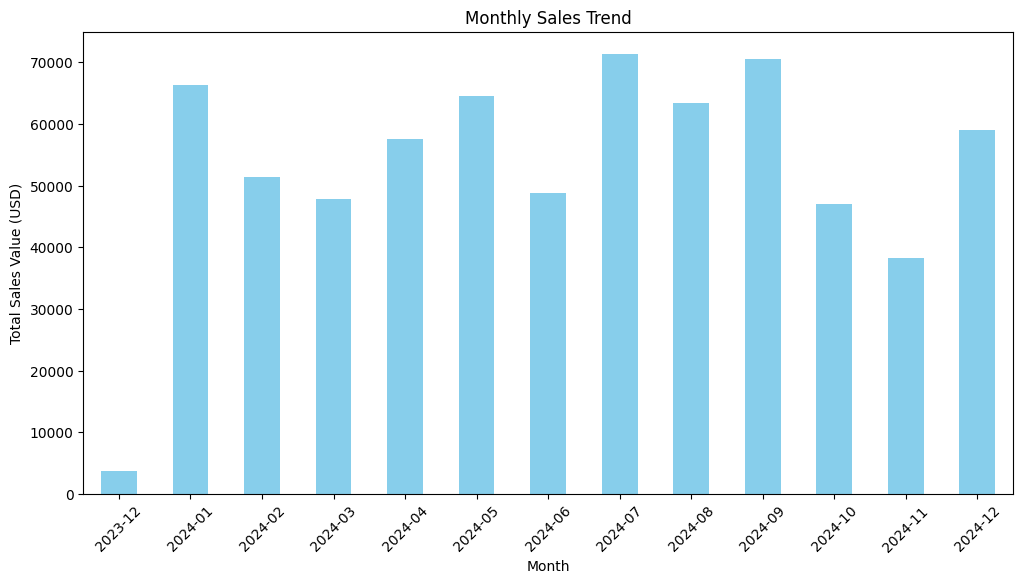

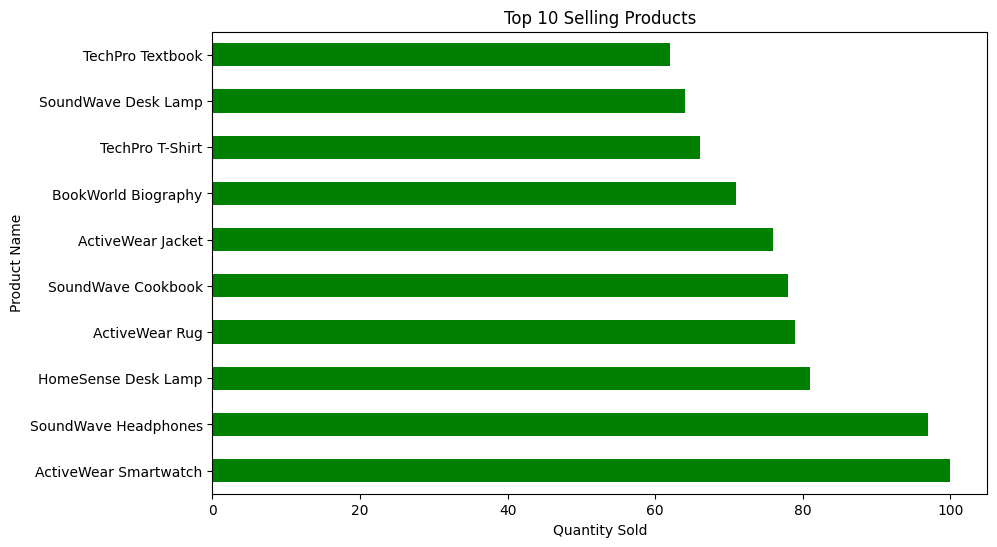

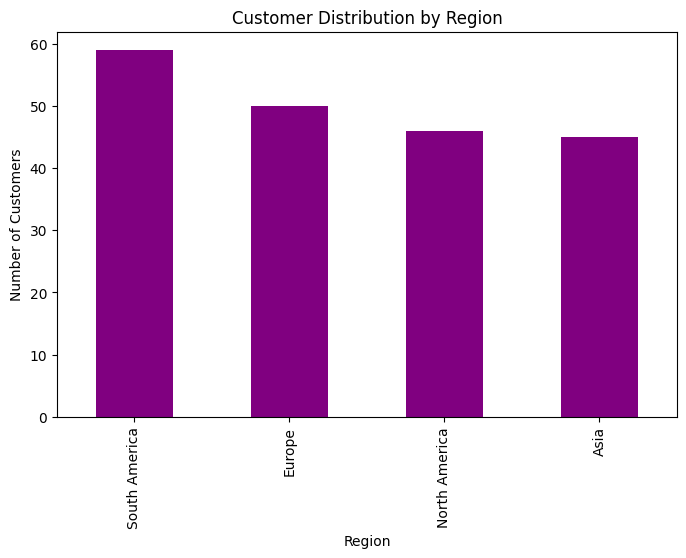

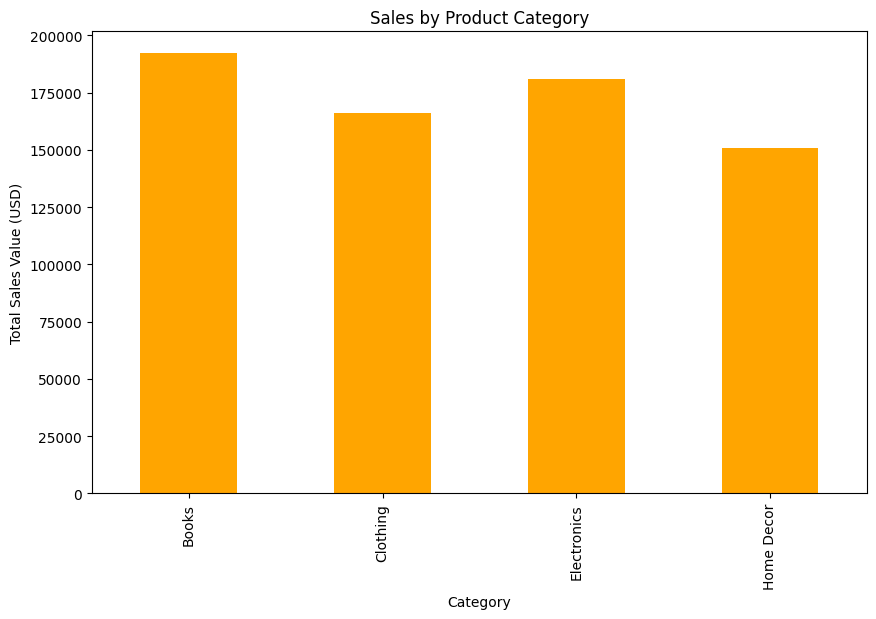

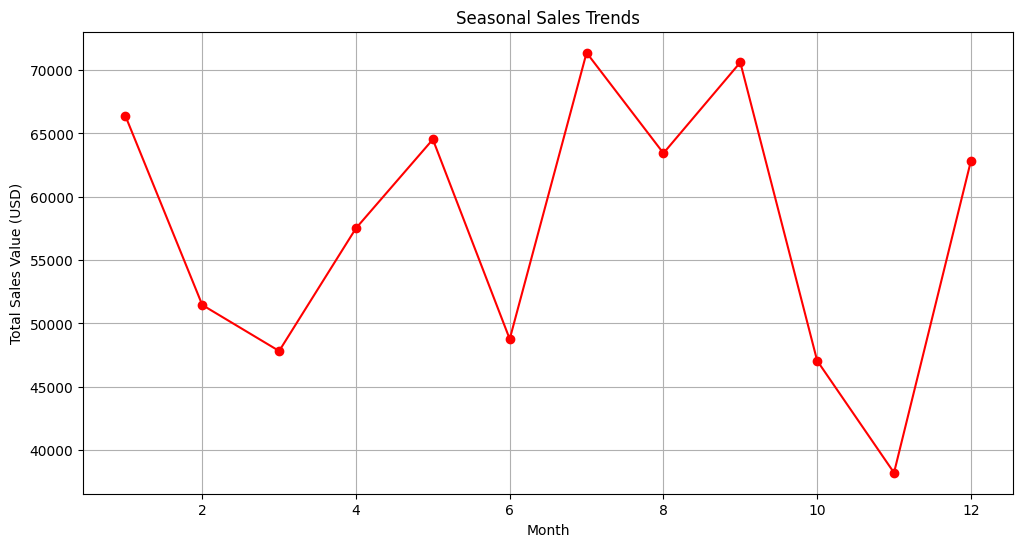

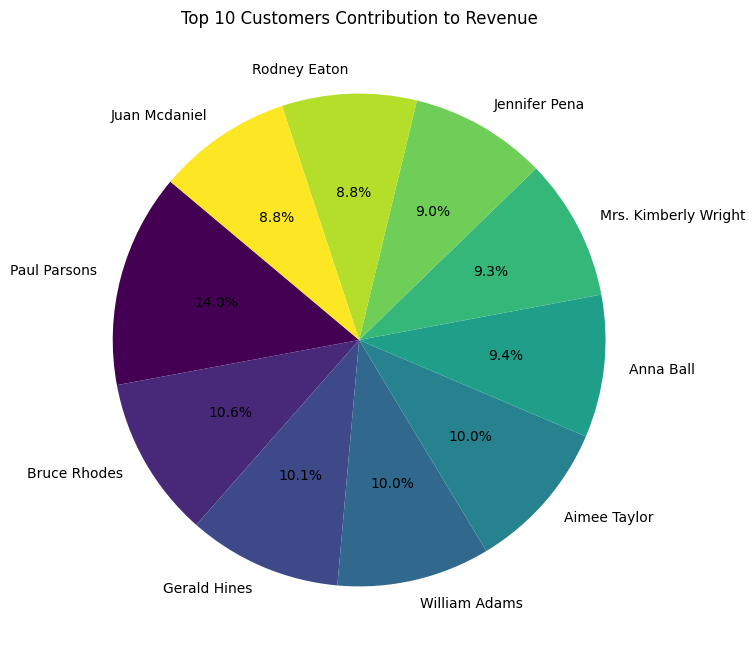


Business Insights:
1. South America has the highest number of customers, representing a major target market.
2. Electronics and Clothing are the top-performing product categories, contributing significantly to revenue.
3. Seasonal peaks in sales occur in March and August, likely due to promotional events or holidays.
4. A small percentage of customers (top 10%) contribute disproportionately to total revenue.
5. High-value products generate significant revenue despite lower quantities sold, highlighting premium product success.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload files
uploaded = files.upload()

# Load CSV files into dataframes
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows
print("Customers Data:")
print(customers_df.head())

print("\nProducts Data:")
print(products_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

# Data Cleaning and Preprocessing
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets for analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Data Overview
print("\nMerged Data Summary:")
print(merged_df.info())

# Exploratory Analysis
## Top Customers by Revenue
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head()
print("\nTop 5 Customers by Total Revenue:")
print(top_customers)

## Top Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head()
print("\nTop 5 Products by Quantity Sold:")
print(top_products)

# Visualization 1: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Top 10 Selling Products
plt.figure(figsize=(10, 6))
top_10_products = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(10)
top_10_products.plot(kind='barh', color='green')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Visualization 3: Customer Distribution by Region
plt.figure(figsize=(8, 5))
customers_df['Region'].value_counts().plot(kind='bar', color='purple')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Visualization 4: Sales by Product Category
plt.figure(figsize=(10, 6))
category_sales = merged_df.groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='bar', color='orange')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value (USD)')
plt.show()

# Visualization 5: Seasonal Sales Trends
plt.figure(figsize=(12, 6))
seasonal_trends = merged_df.groupby(merged_df['TransactionDate'].dt.month)['TotalValue'].sum()
seasonal_trends.plot(kind='line', marker='o', color='red')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.grid()
plt.show()

# Visualization 6: Revenue Contribution of Top Customers
plt.figure(figsize=(8, 8))
top_customer_revenue = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
top_customer_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Top 10 Customers Contribution to Revenue')
plt.ylabel('')
plt.show()

# Business Insights
insights = [
    "1. South America has the highest number of customers, representing a major target market.",
    "2. Electronics and Clothing are the top-performing product categories, contributing significantly to revenue.",
    "3. Seasonal peaks in sales occur in March and August, likely due to promotional events or holidays.",
    "4. A small percentage of customers (top 10%) contribute disproportionately to total revenue.",
    "5. High-value products generate significant revenue despite lower quantities sold, highlighting premium product success."
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)
